In [62]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import labelencoder
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
ionosphere = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data')
adult = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
       

In [63]:
#Cleaning the data before using it to train our algorithms.

In [ ]:
adult.head() #DataFrame

In [88]:
adult.shape

(30162, 86)

In [66]:
#The original dataset did not have properly labelled features, therefore I had to manually input the correct feature names
#The names are based off of https://www.kaggle.com/wenruliu/adult-income-dataset
column = ['age',
'workclass',
'fnlwgt',
'education',
'educational-num',
'marital-status',
'occupation',
'relationship',
'race',
'gender',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'income']
#Extract the column as a datapoint
new_datapoint = pd.Series(adult.columns, index = adult.columns)
new_datapoint

39                            39
 State-gov             State-gov
 77516                     77516
 Bachelors             Bachelors
 13                           13
 Never-married     Never-married
 Adm-clerical       Adm-clerical
 Not-in-family     Not-in-family
 White                     White
 Male                       Male
 2174                       2174
 0                             0
 40                           40
 United-States     United-States
 <=50K                     <=50K
dtype: object

In [67]:
#add the initial column as a datapoint
adult = adult.append(new_datapoint, ignore_index = True)

In [68]:
#replace initial features with properly named features
adult.columns = column
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


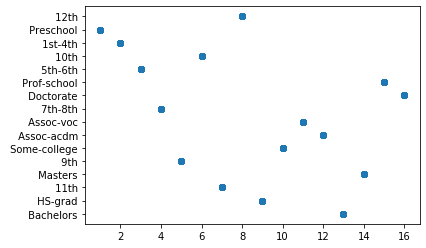

In [69]:
##We remove the educational-num feature because it's fully correlated with education. I.e, we have that 
#as educational-num goes up by unit, so does education. 
plt.scatter( adult['educational-num'], adult['education'])

In [70]:
adult = adult.drop(columns = ['education'])
adult.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We first check if there are any missing data values. A good first check is to use the method DataFrame.isna().any() which tells if if there are any NaN or None values in any of the feature columns. 
However, as we'll see, some datasets indicate missing values with some other value, different from NaN/None (which is annoying).  Then we'd have to list the unique values of the column to find them.

In [71]:
adult.isna().any()
#this shows that there are no NaN values in our design matrix

age                False
workclass          False
fnlwgt             False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [72]:
adult['workclass'].value_counts()
#Here we see that this dataset reports their missing values as '?'


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

We now convert the features to its appropriate type:
There are six continuous features are - age, hours worked per week, education number (numeric representation of the education attribute), capital gain and loss, and a weight attribute which is a demographic score assigned to an individual based on information such as state of residence and type of employment


In [73]:
numerical = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week']
for col in numerical:
    adult[col] = adult[col].astype('float64')

for category in set(adult.columns).difference(set(numerical)):
    adult[category] = adult[category].astype('category')

In [74]:
bad_features = []
for i in adult.columns:
    if ' ?' in pd.Series(pd.Categorical(adult[i])).unique():
        bad_features.append(i)
        print(bad_features)


# current shape of data
print(adult.shape)

# drop rows with missing values
for x in bad_features:
    adult.drop( adult[ adult[x] == ' ?' ].index , inplace=True)


['workclass']
['workclass', 'occupation']
['workclass', 'occupation', 'native-country']
(32561, 14)


In [90]:
sum(adult['fnlwgt'])

5724561619.0

In [80]:
adult.workclass.unique()

AttributeError: 'DataFrame' object has no attribute 'workclass'

In [79]:
#Now we switch to one-hot encoding 
adult = pd.get_dummies(adult, drop_first = True)
adult.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,50.0,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37.0,284582.0,14.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Feature selection is a core concept in Machine Learning. Redundant or irrelevant features will have a negative impact on the performane of our trained algorithm. Thus by reducing our data to the most appropriate features, we effectively reduce overfitting, training time, and testing error. 
We will use the Heatmap Correlation Matrix to seek out any redundant numerical features.

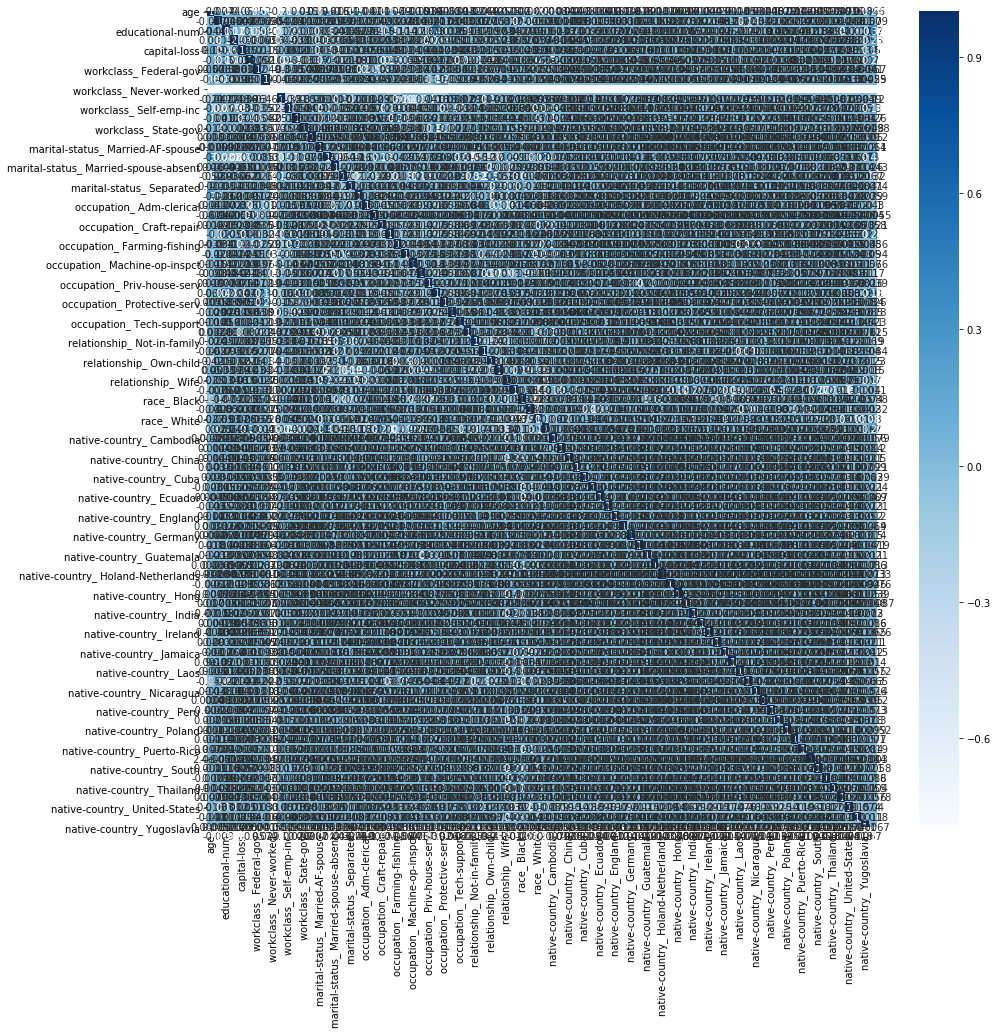

In [77]:
X = adult.iloc[:,0:14] #Design Matrix
Y = adult.iloc[:,-1] #response vector

plt.figure(figsize = (15,15))
sns.heatmap(adult.corr(), cmap='Blues', annot = True)

We see above that there according to the Pearson r correlation, there exists no strong correlation between any pairs of continuous features. However Pearson correlation calculates 'linearity' correlation and assumes homoscedasticity and features are sampled from a gaussian distribution.


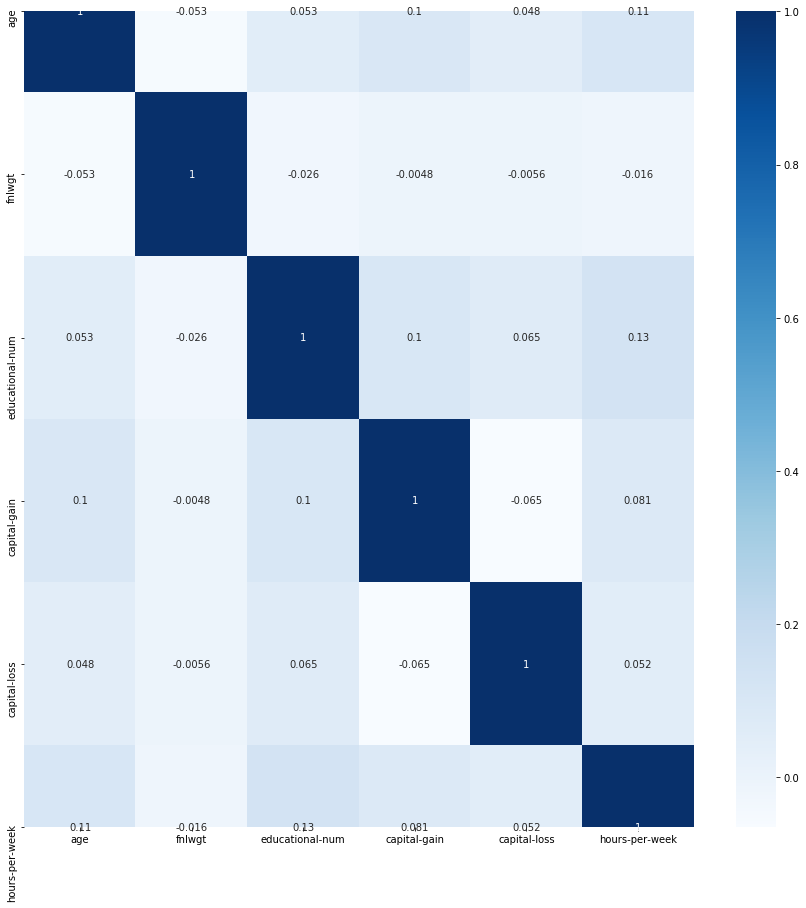

In [47]:
plt.figure(figsize = (15,15))
sns.heatmap(adult.corr(method='kendall'), cmap='Blues', annot = True, )

We use the Kendall tau coefficient which measures the strength of the dependence between two features. We conclude that there exists very little dependence and linear correlation among our continuous features.
We will compare the correlatioin between continuous and categorical variables later on, using Logistic regression.

In [64]:
adult.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
educational-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Now we dive into data exploration:

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [32]:
j = adult[ adult[col] == 'Private' ]
j

Int64Index([], dtype='int64')